<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/Johnson%20SB%20distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U finance-datareader

In [ ]:
# Location parameter : 수익성 (크면 좋음)
# Scale parameter    : 분포

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

def plot_johnsonsb_distribution(stock_code, start_date, end_date):
    # Retrieve stock price data
    stock_data = fdr.DataReader(stock_code, start_date, end_date)

    # Use Adjusted Close price for analysis
    stock_prices = stock_data['Close'].dropna()

    # Calculate returns from stock price data
    returns = stock_prices.pct_change().dropna() * 100  # Convert to percentage returns

    # Fit Johnson SB distribution to the returns data
    params = stats.johnsonsb.fit(returns)

    # Extract location and scale parameters
    location_param = params[0]
    scale_param = params[1]

    # Display the parameters
    print("Location parameter:", location_param)
    print("Scale parameter:", scale_param)

    # Plot the histogram of the returns data and the fitted distribution
    plt.hist(returns, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Returns')

    # Generate values from the fitted distribution
    x = np.linspace(min(returns), max(returns), 100)
    pdf_fitted = stats.johnsonsb.pdf(x, *params)
    plt.plot(x, pdf_fitted, 'r-', label='Johnson SB Distribution')

    plt.xlabel('Returns (%)')
    plt.ylabel('Frequency')
    plt.title('Johnson SB Distribution Fit to Returns')
    plt.legend()
    plt.show()

Location parameter: -80.51949122493801
Scale parameter: 173.35031382726322


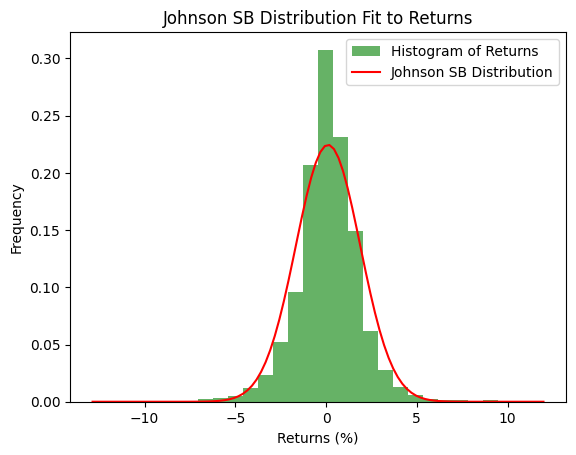

In [5]:
plot_johnsonsb_distribution(stock_code='AAPL', start_date='2010-01-01', end_date='2023-12-31')


Location parameter: -25.15699033620777
Scale parameter: 25.874608848034256


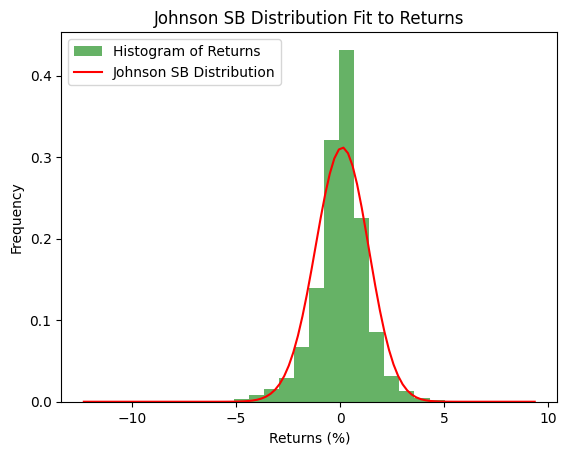

In [7]:
plot_johnsonsb_distribution(stock_code='IXIC', start_date='2010-01-01', end_date='2023-12-31')
